## Monocular camera depth estimation - Capstone 1

In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load simulate ddata
df = pd.read_excel("pixel to distance.xlsx")

In [3]:
df

,X,Y,Z
0,640,360,30.00
1,640,355,29.58
2,640,350,29.17
3,640,345,28.75
4,640,340,28.33
...,...,...,...
67,640,25,2.08
68,640,20,1.67
69,640,15,1.25
70,640,10,0.83


In [4]:
l = [30,29.17,28.33,27.5,26.67,25.83,25,24.17,23.33,22.5,21.67,20.83,20,19.17,18.33,17.5,16.67,15.83,15,14.17,13.33,12.5,11.67,10.83,10,9.17,8.33,7.5,6.67,5.83,5,4.17,3.33,2.5,1.67,0.83
]

In [5]:
print(len(l))

36


In [6]:
import math

## Pixel to distance mapping will be done based on the concept below

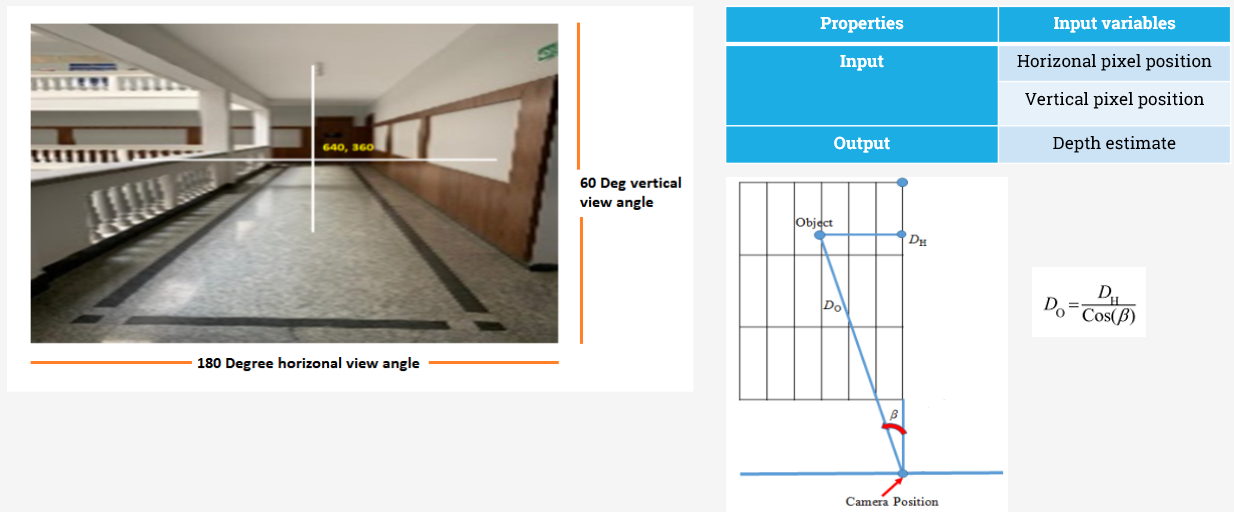

In [7]:
n =[]
for i in range (360, 0, -10):
    k = int((360-i)/10)
    for j in range (640, 0, -10):
            m = (640-j)*0.061
            n.append (list([j,i, round((l[k]/ math.cos(m * (math.pi/180))),2)]))      

In [8]:
n

[[640, 360, 30.0],
 [630, 360, 30.0],
 [620, 360, 30.01],
 [610, 360, 30.02],
 [600, 360, 30.03],
 [590, 360, 30.04],
 [580, 360, 30.06],
 [570, 360, 30.08],
 [560, 360, 30.11],
 [550, 360, 30.14],
 [540, 360, 30.17],
 [530, 360, 30.21],
 [520, 360, 30.25],
 [510, 360, 30.29],
 [500, 360, 30.34],
 [490, 360, 30.39],
 [480, 360, 30.44],
 [470, 360, 30.5],
 [460, 360, 30.56],
 [450, 360, 30.62],
 [440, 360, 30.69],
 [430, 360, 30.77],
 [420, 360, 30.84],
 [410, 360, 30.92],
 [400, 360, 31.01],
 [390, 360, 31.09],
 [380, 360, 31.19],
 [370, 360, 31.28],
 [360, 360, 31.38],
 [350, 360, 31.49],
 [340, 360, 31.6],
 [330, 360, 31.71],
 [320, 360, 31.83],
 [310, 360, 31.95],
 [300, 360, 32.08],
 [290, 360, 32.21],
 [280, 360, 32.35],
 [270, 360, 32.49],
 [260, 360, 32.63],
 [250, 360, 32.79],
 [240, 360, 32.94],
 [230, 360, 33.1],
 [220, 360, 33.27],
 [210, 360, 33.44],
 [200, 360, 33.62],
 [190, 360, 33.81],
 [180, 360, 34.0],
 [170, 360, 34.19],
 [160, 360, 34.39],
 [150, 360, 34.6],
 [140, 

In [9]:
df1 = pd.DataFrame(n)

In [10]:
df1

,0,1,2
0,640,360,30.00
1,630,360,30.00
2,620,360,30.01
3,610,360,30.02
4,600,360,30.03
...,...,...,...
2299,50,10,1.03
2300,40,10,1.03
2301,30,10,1.04
2302,20,10,1.05


In [11]:
df1.rename(columns={0:'X',1:'Y',2:'Z'}, inplace=True)

In [12]:
df1

,X,Y,Z
0,640,360,30.00
1,630,360,30.00
2,620,360,30.01
3,610,360,30.02
4,600,360,30.03
...,...,...,...
2299,50,10,1.03
2300,40,10,1.03
2301,30,10,1.04
2302,20,10,1.05


In [55]:
df4 = pd.concat([df, df1])

In [56]:
X = df4.drop(columns='Z')

In [57]:
X

,X,Y
0,640,360
1,640,355
2,640,350
3,640,345
4,640,340
...,...,...
2299,50,10
2300,40,10
2301,30,10
2302,20,10


In [58]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [59]:
X

,X,Y
0,1.000000,1.000000
1,1.000000,0.985915
2,1.000000,0.971831
3,1.000000,0.957746
4,1.000000,0.943662
...,...,...
2371,0.063492,0.014085
2372,0.047619,0.014085
2373,0.031746,0.014085
2374,0.015873,0.014085


In [60]:
y = df4['Z'].values

In [61]:
y

array([30.  , 29.58, 29.17, ...,  1.04,  1.05,  1.06])

In [62]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [35]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

### Test and train models will be run through 4 differnt DL model configurations

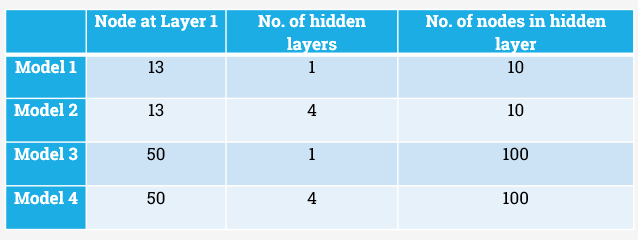

## Model 1

In [36]:
# simple Neural Network - Single layer
model = Sequential()
model.add(Dense(13, input_dim=2, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape','RootMeanSquaredError'])
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),verbose=2,epochs=200)

Epoch 1/200
52/52 - 1s - loss: 357.9684 - mse: 357.9684 - mae: 16.4171 - mape: 97.9531 - root_mean_squared_error: 18.9201 - val_loss: 357.3096 - val_mse: 357.3096 - val_mae: 16.3919 - val_mape: 95.8333 - val_root_mean_squared_error: 18.9026
Epoch 2/200
52/52 - 0s - loss: 339.1727 - mse: 339.1727 - mae: 15.8830 - mape: 92.2234 - root_mean_squared_error: 18.4166 - val_loss: 332.9634 - val_mse: 332.9634 - val_mae: 15.6851 - val_mape: 88.2710 - val_root_mean_squared_error: 18.2473
Epoch 3/200
52/52 - 0s - loss: 308.9526 - mse: 308.9526 - mae: 14.9880 - mape: 84.1716 - root_mean_squared_error: 17.5770 - val_loss: 294.6966 - val_mse: 294.6966 - val_mae: 14.5356 - val_mape: 79.2794 - val_root_mean_squared_error: 17.1667
Epoch 4/200
52/52 - 0s - loss: 262.7383 - mse: 262.7383 - mae: 13.5636 - mape: 76.4676 - root_mean_squared_error: 16.2092 - val_loss: 238.7308 - val_mse: 238.7308 - val_mae: 12.8020 - val_mape: 71.8400 - val_root_mean_squared_error: 15.4509
Epoch 5/200
52/52 - 0s - loss: 202.1

Epoch 37/200
52/52 - 0s - loss: 0.5644 - mse: 0.5644 - mae: 0.5672 - mape: 9.0750 - root_mean_squared_error: 0.7513 - val_loss: 0.6438 - val_mse: 0.6438 - val_mae: 0.5967 - val_mape: 8.7487 - val_root_mean_squared_error: 0.8023
Epoch 38/200
52/52 - 0s - loss: 0.5602 - mse: 0.5602 - mae: 0.5688 - mape: 8.9896 - root_mean_squared_error: 0.7485 - val_loss: 0.6412 - val_mse: 0.6412 - val_mae: 0.5956 - val_mape: 8.6907 - val_root_mean_squared_error: 0.8008
Epoch 39/200
52/52 - 0s - loss: 0.5568 - mse: 0.5568 - mae: 0.5658 - mape: 9.0357 - root_mean_squared_error: 0.7462 - val_loss: 0.6334 - val_mse: 0.6334 - val_mae: 0.5978 - val_mape: 8.7857 - val_root_mean_squared_error: 0.7959
Epoch 40/200
52/52 - 0s - loss: 0.5536 - mse: 0.5536 - mae: 0.5682 - mape: 8.9886 - root_mean_squared_error: 0.7441 - val_loss: 0.6283 - val_mse: 0.6283 - val_mae: 0.6016 - val_mape: 8.8397 - val_root_mean_squared_error: 0.7927
Epoch 41/200
52/52 - 0s - loss: 0.5515 - mse: 0.5515 - mae: 0.5646 - mape: 8.9930 - root

Epoch 73/200
52/52 - 0s - loss: 0.5352 - mse: 0.5352 - mae: 0.5619 - mape: 8.4751 - root_mean_squared_error: 0.7316 - val_loss: 0.6036 - val_mse: 0.6036 - val_mae: 0.6211 - val_mape: 8.9314 - val_root_mean_squared_error: 0.7769
Epoch 74/200
52/52 - 0s - loss: 0.5517 - mse: 0.5517 - mae: 0.5743 - mape: 8.7280 - root_mean_squared_error: 0.7428 - val_loss: 0.5922 - val_mse: 0.5922 - val_mae: 0.5937 - val_mape: 8.5707 - val_root_mean_squared_error: 0.7695
Epoch 75/200
52/52 - 0s - loss: 0.5356 - mse: 0.5356 - mae: 0.5637 - mape: 8.4921 - root_mean_squared_error: 0.7319 - val_loss: 0.5970 - val_mse: 0.5970 - val_mae: 0.6132 - val_mape: 8.8010 - val_root_mean_squared_error: 0.7727
Epoch 76/200
52/52 - 0s - loss: 0.5289 - mse: 0.5289 - mae: 0.5594 - mape: 8.5442 - root_mean_squared_error: 0.7272 - val_loss: 0.5918 - val_mse: 0.5918 - val_mae: 0.6039 - val_mape: 8.7472 - val_root_mean_squared_error: 0.7693
Epoch 77/200
52/52 - 0s - loss: 0.5331 - mse: 0.5331 - mae: 0.5623 - mape: 8.5667 - root

Epoch 109/200
52/52 - 0s - loss: 0.5112 - mse: 0.5112 - mae: 0.5525 - mape: 8.2181 - root_mean_squared_error: 0.7150 - val_loss: 0.5709 - val_mse: 0.5709 - val_mae: 0.5765 - val_mape: 8.3191 - val_root_mean_squared_error: 0.7555
Epoch 110/200
52/52 - 0s - loss: 0.5106 - mse: 0.5106 - mae: 0.5477 - mape: 8.4885 - root_mean_squared_error: 0.7146 - val_loss: 0.5789 - val_mse: 0.5789 - val_mae: 0.5729 - val_mape: 8.1516 - val_root_mean_squared_error: 0.7608
Epoch 111/200
52/52 - 0s - loss: 0.5064 - mse: 0.5064 - mae: 0.5501 - mape: 8.2522 - root_mean_squared_error: 0.7116 - val_loss: 0.5731 - val_mse: 0.5731 - val_mae: 0.5737 - val_mape: 8.2208 - val_root_mean_squared_error: 0.7570
Epoch 112/200
52/52 - 0s - loss: 0.5041 - mse: 0.5041 - mae: 0.5477 - mape: 8.4271 - root_mean_squared_error: 0.7100 - val_loss: 0.5790 - val_mse: 0.5790 - val_mae: 0.5736 - val_mape: 8.0604 - val_root_mean_squared_error: 0.7609
Epoch 113/200
52/52 - 0s - loss: 0.5013 - mse: 0.5013 - mae: 0.5428 - mape: 8.4627 -

Epoch 145/200
52/52 - 0s - loss: 0.2999 - mse: 0.2999 - mae: 0.4118 - mape: 5.5864 - root_mean_squared_error: 0.5476 - val_loss: 0.3064 - val_mse: 0.3064 - val_mae: 0.4156 - val_mape: 5.4613 - val_root_mean_squared_error: 0.5536
Epoch 146/200
52/52 - 0s - loss: 0.2609 - mse: 0.2609 - mae: 0.3789 - mape: 5.0581 - root_mean_squared_error: 0.5108 - val_loss: 0.2778 - val_mse: 0.2778 - val_mae: 0.4017 - val_mape: 5.0570 - val_root_mean_squared_error: 0.5271
Epoch 147/200
52/52 - 0s - loss: 0.2286 - mse: 0.2286 - mae: 0.3505 - mape: 4.6987 - root_mean_squared_error: 0.4781 - val_loss: 0.2372 - val_mse: 0.2372 - val_mae: 0.3631 - val_mape: 4.7706 - val_root_mean_squared_error: 0.4870
Epoch 148/200
52/52 - 0s - loss: 0.1987 - mse: 0.1987 - mae: 0.3225 - mape: 4.4642 - root_mean_squared_error: 0.4458 - val_loss: 0.2087 - val_mse: 0.2087 - val_mae: 0.3245 - val_mape: 4.5743 - val_root_mean_squared_error: 0.4569
Epoch 149/200
52/52 - 0s - loss: 0.1763 - mse: 0.1763 - mae: 0.3018 - mape: 4.3103 -

Epoch 181/200
52/52 - 0s - loss: 0.0547 - mse: 0.0547 - mae: 0.1830 - mape: 2.4914 - root_mean_squared_error: 0.2338 - val_loss: 0.0563 - val_mse: 0.0563 - val_mae: 0.1856 - val_mape: 2.4641 - val_root_mean_squared_error: 0.2373
Epoch 182/200
52/52 - 0s - loss: 0.0520 - mse: 0.0520 - mae: 0.1769 - mape: 2.4238 - root_mean_squared_error: 0.2280 - val_loss: 0.0580 - val_mse: 0.0580 - val_mae: 0.1895 - val_mape: 2.4840 - val_root_mean_squared_error: 0.2409
Epoch 183/200
52/52 - 0s - loss: 0.0502 - mse: 0.0502 - mae: 0.1746 - mape: 2.3569 - root_mean_squared_error: 0.2240 - val_loss: 0.0567 - val_mse: 0.0567 - val_mae: 0.1890 - val_mape: 2.4036 - val_root_mean_squared_error: 0.2381
Epoch 184/200
52/52 - 0s - loss: 0.0483 - mse: 0.0483 - mae: 0.1710 - mape: 2.2636 - root_mean_squared_error: 0.2198 - val_loss: 0.0521 - val_mse: 0.0521 - val_mae: 0.1796 - val_mape: 2.2449 - val_root_mean_squared_error: 0.2282
Epoch 185/200
52/52 - 0s - loss: 0.0474 - mse: 0.0474 - mae: 0.1703 - mape: 2.1890 -

dict_keys(['loss', 'mse', 'mae', 'mape', 'root_mean_squared_error', 'val_loss', 'val_mse', 'val_mae', 'val_mape', 'val_root_mean_squared_error'])


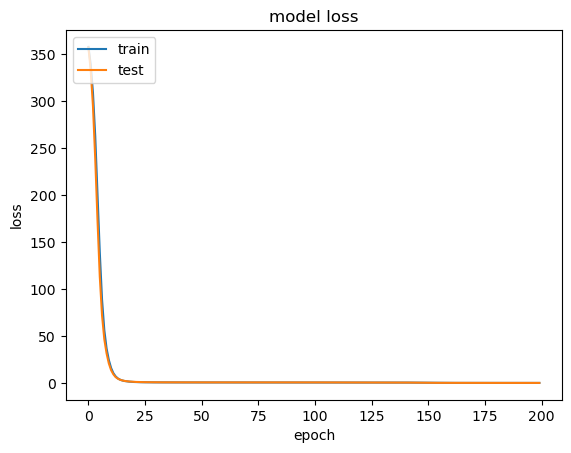

dict_keys(['loss', 'mse', 'mae', 'mape', 'root_mean_squared_error', 'val_loss', 'val_mse', 'val_mae', 'val_mape', 'val_root_mean_squared_error'])


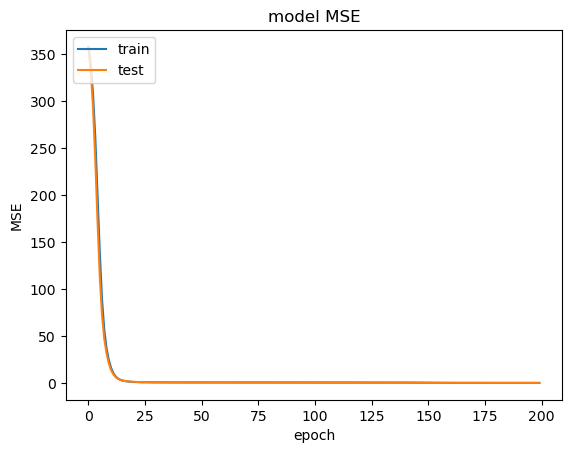

dict_keys(['loss', 'mse', 'mae', 'mape', 'root_mean_squared_error', 'val_loss', 'val_mse', 'val_mae', 'val_mape', 'val_root_mean_squared_error'])


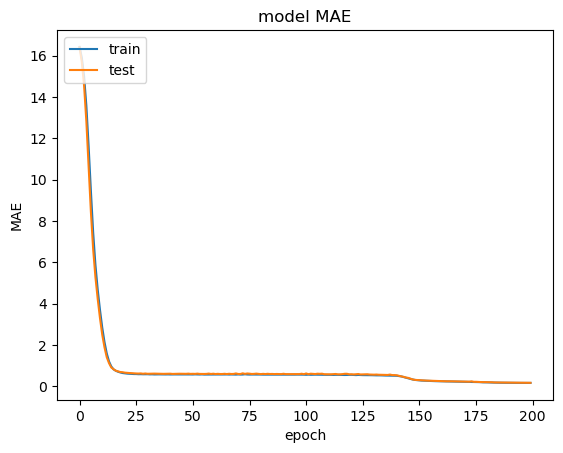

dict_keys(['loss', 'mse', 'mae', 'mape', 'root_mean_squared_error', 'val_loss', 'val_mse', 'val_mae', 'val_mape', 'val_root_mean_squared_error'])


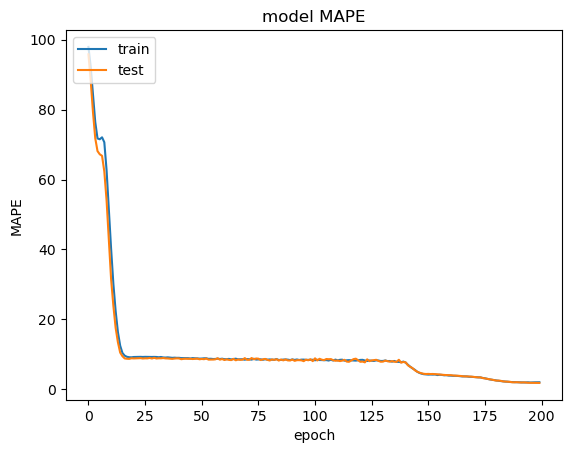

dict_keys(['loss', 'mse', 'mae', 'mape', 'root_mean_squared_error', 'val_loss', 'val_mse', 'val_mae', 'val_mape', 'val_root_mean_squared_error'])


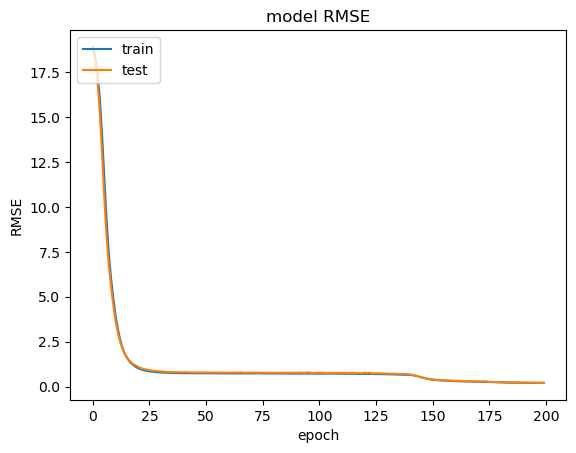

In [37]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mape'])
plt.plot(history.history['val_mape'])
plt.title('model MAPE')
plt.ylabel('MAPE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model RMSE')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Model 2

In [46]:
# Define model architecture
model = Sequential()
model.add(Dense(13, input_dim=2, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape','RootMeanSquaredError'])
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),verbose=2,epochs=200)

Epoch 1/200
52/52 - 1s - loss: 369.5697 - mse: 369.5697 - mae: 16.7115 - mape: 100.7450 - root_mean_squared_error: 19.2242 - val_loss: 370.1172 - val_mse: 370.1172 - val_mae: 16.7128 - val_mape: 98.4671 - val_root_mean_squared_error: 19.2384
Epoch 2/200
52/52 - 0s - loss: 350.9452 - mse: 350.9452 - mae: 16.1886 - mape: 94.7636 - root_mean_squared_error: 18.7335 - val_loss: 337.2744 - val_mse: 337.2744 - val_mae: 15.7964 - val_mape: 88.8948 - val_root_mean_squared_error: 18.3650
Epoch 3/200
52/52 - 0s - loss: 283.8914 - mse: 283.8914 - mae: 14.2554 - mape: 80.0396 - root_mean_squared_error: 16.8491 - val_loss: 225.7216 - val_mse: 225.7216 - val_mae: 12.4701 - val_mape: 70.2827 - val_root_mean_squared_error: 15.0240
Epoch 4/200
52/52 - 0s - loss: 145.9230 - mse: 145.9230 - mae: 9.7679 - mape: 73.0929 - root_mean_squared_error: 12.0799 - val_loss: 81.4079 - val_mse: 81.4079 - val_mae: 7.2654 - val_mape: 73.8788 - val_root_mean_squared_error: 9.0226
Epoch 5/200
52/52 - 0s - loss: 53.7757 -

Epoch 37/200
52/52 - 0s - loss: 0.1167 - mse: 0.1167 - mae: 0.2324 - mape: 3.3891 - root_mean_squared_error: 0.3417 - val_loss: 0.1255 - val_mse: 0.1255 - val_mae: 0.2368 - val_mape: 3.3979 - val_root_mean_squared_error: 0.3543
Epoch 38/200
52/52 - 0s - loss: 0.1088 - mse: 0.1088 - mae: 0.2267 - mape: 3.3771 - root_mean_squared_error: 0.3298 - val_loss: 0.1165 - val_mse: 0.1165 - val_mae: 0.2341 - val_mape: 3.3589 - val_root_mean_squared_error: 0.3413
Epoch 39/200
52/52 - 0s - loss: 0.0999 - mse: 0.0999 - mae: 0.2198 - mape: 3.3962 - root_mean_squared_error: 0.3161 - val_loss: 0.1058 - val_mse: 0.1058 - val_mae: 0.2249 - val_mape: 3.2423 - val_root_mean_squared_error: 0.3252
Epoch 40/200
52/52 - 0s - loss: 0.0910 - mse: 0.0910 - mae: 0.2128 - mape: 3.2491 - root_mean_squared_error: 0.3016 - val_loss: 0.0981 - val_mse: 0.0981 - val_mae: 0.2154 - val_mape: 3.2391 - val_root_mean_squared_error: 0.3132
Epoch 41/200
52/52 - 0s - loss: 0.0851 - mse: 0.0851 - mae: 0.2049 - mape: 3.2823 - root

Epoch 73/200
52/52 - 0s - loss: 0.0507 - mse: 0.0507 - mae: 0.1648 - mape: 2.5942 - root_mean_squared_error: 0.2253 - val_loss: 0.0544 - val_mse: 0.0544 - val_mae: 0.1678 - val_mape: 2.7161 - val_root_mean_squared_error: 0.2332
Epoch 74/200
52/52 - 0s - loss: 0.0501 - mse: 0.0501 - mae: 0.1655 - mape: 2.6570 - root_mean_squared_error: 0.2239 - val_loss: 0.0551 - val_mse: 0.0551 - val_mae: 0.1718 - val_mape: 2.7087 - val_root_mean_squared_error: 0.2348
Epoch 75/200
52/52 - 0s - loss: 0.0548 - mse: 0.0548 - mae: 0.1769 - mape: 2.7516 - root_mean_squared_error: 0.2342 - val_loss: 0.0543 - val_mse: 0.0543 - val_mae: 0.1670 - val_mape: 2.7226 - val_root_mean_squared_error: 0.2330
Epoch 76/200
52/52 - 0s - loss: 0.0505 - mse: 0.0505 - mae: 0.1637 - mape: 2.6837 - root_mean_squared_error: 0.2246 - val_loss: 0.0557 - val_mse: 0.0557 - val_mae: 0.1736 - val_mape: 2.6988 - val_root_mean_squared_error: 0.2361
Epoch 77/200
52/52 - 0s - loss: 0.0510 - mse: 0.0510 - mae: 0.1661 - mape: 2.6608 - root

Epoch 109/200
52/52 - 0s - loss: 0.0516 - mse: 0.0516 - mae: 0.1694 - mape: 2.6599 - root_mean_squared_error: 0.2272 - val_loss: 0.0548 - val_mse: 0.0548 - val_mae: 0.1672 - val_mape: 2.7438 - val_root_mean_squared_error: 0.2340
Epoch 110/200
52/52 - 0s - loss: 0.0503 - mse: 0.0503 - mae: 0.1637 - mape: 2.6382 - root_mean_squared_error: 0.2242 - val_loss: 0.0537 - val_mse: 0.0537 - val_mae: 0.1719 - val_mape: 2.5800 - val_root_mean_squared_error: 0.2318
Epoch 111/200
52/52 - 0s - loss: 0.0500 - mse: 0.0500 - mae: 0.1646 - mape: 2.6187 - root_mean_squared_error: 0.2236 - val_loss: 0.0535 - val_mse: 0.0535 - val_mae: 0.1666 - val_mape: 2.6811 - val_root_mean_squared_error: 0.2314
Epoch 112/200
52/52 - 0s - loss: 0.0493 - mse: 0.0493 - mae: 0.1631 - mape: 2.5723 - root_mean_squared_error: 0.2221 - val_loss: 0.0554 - val_mse: 0.0554 - val_mae: 0.1695 - val_mape: 2.8635 - val_root_mean_squared_error: 0.2353
Epoch 113/200
52/52 - 0s - loss: 0.0520 - mse: 0.0520 - mae: 0.1692 - mape: 2.6826 -

Epoch 145/200
52/52 - 0s - loss: 0.0497 - mse: 0.0497 - mae: 0.1640 - mape: 2.5955 - root_mean_squared_error: 0.2230 - val_loss: 0.0554 - val_mse: 0.0554 - val_mae: 0.1741 - val_mape: 2.6709 - val_root_mean_squared_error: 0.2353
Epoch 146/200
52/52 - 0s - loss: 0.0519 - mse: 0.0519 - mae: 0.1715 - mape: 2.6752 - root_mean_squared_error: 0.2278 - val_loss: 0.0550 - val_mse: 0.0550 - val_mae: 0.1646 - val_mape: 2.8883 - val_root_mean_squared_error: 0.2345
Epoch 147/200
52/52 - 0s - loss: 0.0500 - mse: 0.0500 - mae: 0.1639 - mape: 2.6040 - root_mean_squared_error: 0.2236 - val_loss: 0.0541 - val_mse: 0.0541 - val_mae: 0.1687 - val_mape: 2.7181 - val_root_mean_squared_error: 0.2327
Epoch 148/200
52/52 - 0s - loss: 0.0500 - mse: 0.0500 - mae: 0.1629 - mape: 2.6283 - root_mean_squared_error: 0.2236 - val_loss: 0.0555 - val_mse: 0.0555 - val_mae: 0.1760 - val_mape: 2.7038 - val_root_mean_squared_error: 0.2355
Epoch 149/200
52/52 - 0s - loss: 0.0493 - mse: 0.0493 - mae: 0.1639 - mape: 2.5736 -

Epoch 181/200
52/52 - 0s - loss: 0.0504 - mse: 0.0504 - mae: 0.1655 - mape: 2.6012 - root_mean_squared_error: 0.2245 - val_loss: 0.0586 - val_mse: 0.0586 - val_mae: 0.1815 - val_mape: 2.7100 - val_root_mean_squared_error: 0.2420
Epoch 182/200
52/52 - 0s - loss: 0.0532 - mse: 0.0532 - mae: 0.1745 - mape: 2.7082 - root_mean_squared_error: 0.2306 - val_loss: 0.0542 - val_mse: 0.0542 - val_mae: 0.1699 - val_mape: 2.7013 - val_root_mean_squared_error: 0.2329
Epoch 183/200
52/52 - 0s - loss: 0.0524 - mse: 0.0524 - mae: 0.1716 - mape: 2.7256 - root_mean_squared_error: 0.2288 - val_loss: 0.0766 - val_mse: 0.0766 - val_mae: 0.2256 - val_mape: 3.0282 - val_root_mean_squared_error: 0.2768
Epoch 184/200
52/52 - 0s - loss: 0.0585 - mse: 0.0585 - mae: 0.1835 - mape: 2.8600 - root_mean_squared_error: 0.2418 - val_loss: 0.0540 - val_mse: 0.0540 - val_mae: 0.1691 - val_mape: 2.6812 - val_root_mean_squared_error: 0.2323
Epoch 185/200
52/52 - 0s - loss: 0.0496 - mse: 0.0496 - mae: 0.1638 - mape: 2.6201 -

dict_keys(['loss', 'mse', 'mae', 'mape', 'root_mean_squared_error', 'val_loss', 'val_mse', 'val_mae', 'val_mape', 'val_root_mean_squared_error'])


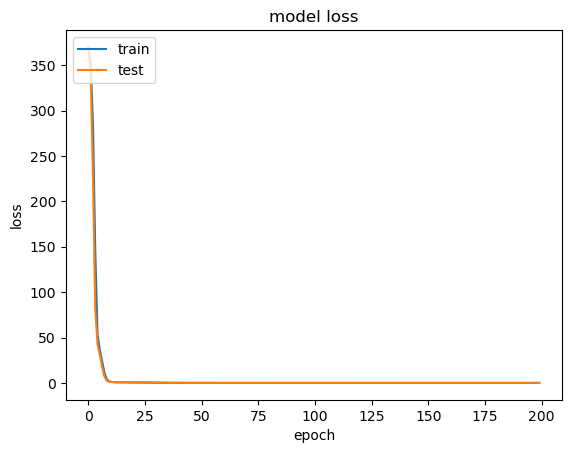

dict_keys(['loss', 'mse', 'mae', 'mape', 'root_mean_squared_error', 'val_loss', 'val_mse', 'val_mae', 'val_mape', 'val_root_mean_squared_error'])


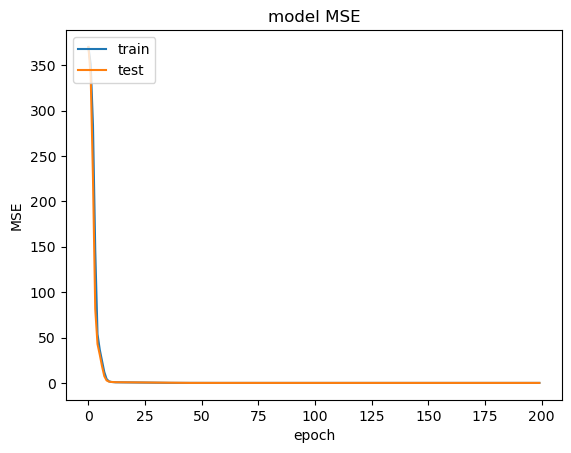

dict_keys(['loss', 'mse', 'mae', 'mape', 'root_mean_squared_error', 'val_loss', 'val_mse', 'val_mae', 'val_mape', 'val_root_mean_squared_error'])


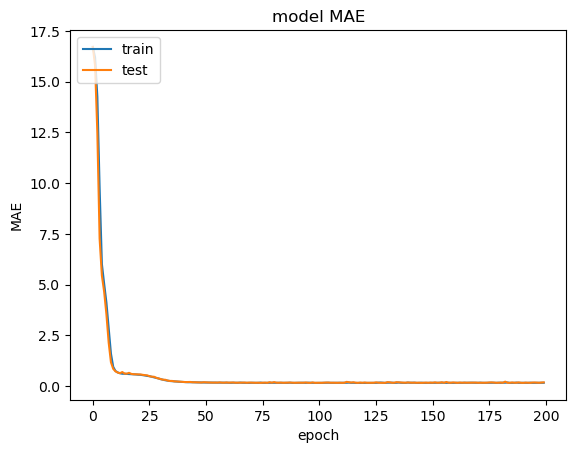

dict_keys(['loss', 'mse', 'mae', 'mape', 'root_mean_squared_error', 'val_loss', 'val_mse', 'val_mae', 'val_mape', 'val_root_mean_squared_error'])


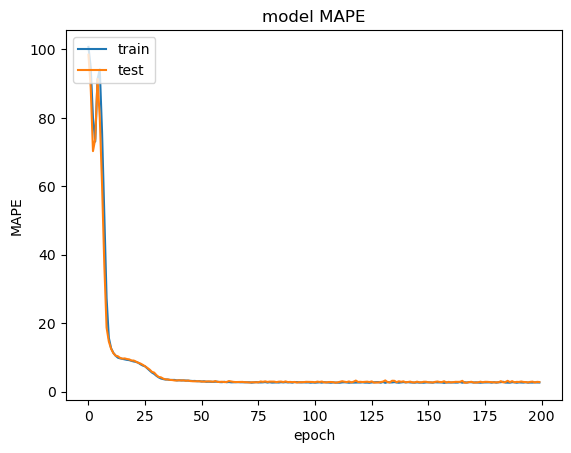

dict_keys(['loss', 'mse', 'mae', 'mape', 'root_mean_squared_error', 'val_loss', 'val_mse', 'val_mae', 'val_mape', 'val_root_mean_squared_error'])


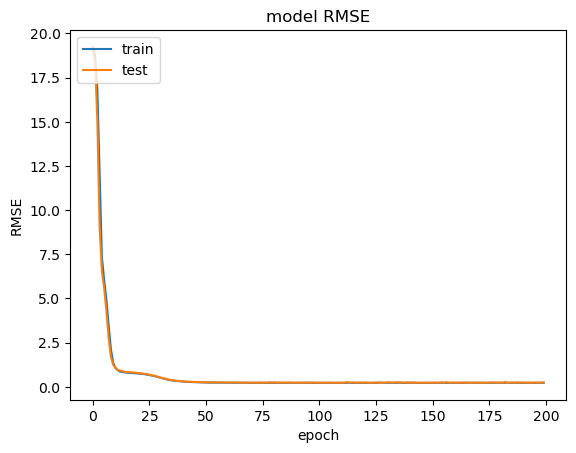

In [47]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mape'])
plt.plot(history.history['val_mape'])
plt.title('model MAPE')
plt.ylabel('MAPE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model RMSE')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Model 3

In [49]:
# simple Neural Network - Single layer : More neuron
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape','RootMeanSquaredError'])
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),verbose=2,epochs=200)

Epoch 1/200
52/52 - 1s - loss: 324.9339 - mse: 324.9339 - mae: 15.4326 - mape: 88.8868 - root_mean_squared_error: 18.0259 - val_loss: 266.3829 - val_mse: 266.3829 - val_mae: 13.6619 - val_mape: 75.9809 - val_root_mean_squared_error: 16.3212
Epoch 2/200
52/52 - 0s - loss: 150.3126 - mse: 150.3126 - mae: 9.7817 - mape: 82.6045 - root_mean_squared_error: 12.2602 - val_loss: 66.5182 - val_mse: 66.5182 - val_mae: 6.7000 - val_mape: 99.4369 - val_root_mean_squared_error: 8.1559
Epoch 3/200
52/52 - 0s - loss: 52.4865 - mse: 52.4865 - mae: 6.0009 - mape: 109.5753 - root_mean_squared_error: 7.2448 - val_loss: 42.3357 - val_mse: 42.3357 - val_mae: 5.3993 - val_mape: 90.3841 - val_root_mean_squared_error: 6.5066
Epoch 4/200
52/52 - 0s - loss: 32.7380 - mse: 32.7380 - mae: 4.7522 - mape: 89.6357 - root_mean_squared_error: 5.7217 - val_loss: 24.6715 - val_mse: 24.6715 - val_mae: 4.1279 - val_mape: 71.3610 - val_root_mean_squared_error: 4.9670
Epoch 5/200
52/52 - 0s - loss: 17.1965 - mse: 17.1965 - 

Epoch 37/200
52/52 - 0s - loss: 0.0451 - mse: 0.0451 - mae: 0.1443 - mape: 1.6615 - root_mean_squared_error: 0.2124 - val_loss: 0.0504 - val_mse: 0.0504 - val_mae: 0.1453 - val_mape: 1.4650 - val_root_mean_squared_error: 0.2245
Epoch 38/200
52/52 - 0s - loss: 0.0417 - mse: 0.0417 - mae: 0.1373 - mape: 1.5191 - root_mean_squared_error: 0.2043 - val_loss: 0.0480 - val_mse: 0.0480 - val_mae: 0.1485 - val_mape: 1.5422 - val_root_mean_squared_error: 0.2192
Epoch 39/200
52/52 - 0s - loss: 0.0394 - mse: 0.0394 - mae: 0.1340 - mape: 1.4584 - root_mean_squared_error: 0.1984 - val_loss: 0.0466 - val_mse: 0.0466 - val_mae: 0.1389 - val_mape: 1.3606 - val_root_mean_squared_error: 0.2158
Epoch 40/200
52/52 - 0s - loss: 0.0368 - mse: 0.0368 - mae: 0.1300 - mape: 1.4029 - root_mean_squared_error: 0.1919 - val_loss: 0.0421 - val_mse: 0.0421 - val_mae: 0.1370 - val_mape: 1.3375 - val_root_mean_squared_error: 0.2051
Epoch 41/200
52/52 - 0s - loss: 0.0351 - mse: 0.0351 - mae: 0.1286 - mape: 1.4053 - root

Epoch 73/200
52/52 - 0s - loss: 0.0119 - mse: 0.0119 - mae: 0.0808 - mape: 0.9092 - root_mean_squared_error: 0.1089 - val_loss: 0.0136 - val_mse: 0.0136 - val_mae: 0.0814 - val_mape: 0.7973 - val_root_mean_squared_error: 0.1165
Epoch 74/200
52/52 - 0s - loss: 0.0113 - mse: 0.0113 - mae: 0.0775 - mape: 0.8539 - root_mean_squared_error: 0.1062 - val_loss: 0.0130 - val_mse: 0.0130 - val_mae: 0.0829 - val_mape: 0.8460 - val_root_mean_squared_error: 0.1139
Epoch 75/200
52/52 - 0s - loss: 0.0115 - mse: 0.0115 - mae: 0.0792 - mape: 0.8705 - root_mean_squared_error: 0.1070 - val_loss: 0.0123 - val_mse: 0.0123 - val_mae: 0.0812 - val_mape: 0.7878 - val_root_mean_squared_error: 0.1110
Epoch 76/200
52/52 - 0s - loss: 0.0111 - mse: 0.0111 - mae: 0.0779 - mape: 0.8670 - root_mean_squared_error: 0.1054 - val_loss: 0.0124 - val_mse: 0.0124 - val_mae: 0.0787 - val_mape: 0.7795 - val_root_mean_squared_error: 0.1115
Epoch 77/200
52/52 - 0s - loss: 0.0112 - mse: 0.0112 - mae: 0.0790 - mape: 0.8971 - root

Epoch 109/200
52/52 - 0s - loss: 0.0077 - mse: 0.0077 - mae: 0.0685 - mape: 0.8607 - root_mean_squared_error: 0.0879 - val_loss: 0.0085 - val_mse: 0.0085 - val_mae: 0.0686 - val_mape: 0.8085 - val_root_mean_squared_error: 0.0924
Epoch 110/200
52/52 - 0s - loss: 0.0073 - mse: 0.0073 - mae: 0.0668 - mape: 0.8422 - root_mean_squared_error: 0.0857 - val_loss: 0.0085 - val_mse: 0.0085 - val_mae: 0.0696 - val_mape: 0.8264 - val_root_mean_squared_error: 0.0924
Epoch 111/200
52/52 - 0s - loss: 0.0082 - mse: 0.0082 - mae: 0.0710 - mape: 0.8807 - root_mean_squared_error: 0.0905 - val_loss: 0.0080 - val_mse: 0.0080 - val_mae: 0.0692 - val_mape: 0.8485 - val_root_mean_squared_error: 0.0892
Epoch 112/200
52/52 - 0s - loss: 0.0076 - mse: 0.0076 - mae: 0.0679 - mape: 0.8506 - root_mean_squared_error: 0.0874 - val_loss: 0.0104 - val_mse: 0.0104 - val_mae: 0.0804 - val_mape: 0.9258 - val_root_mean_squared_error: 0.1018
Epoch 113/200
52/52 - 0s - loss: 0.0080 - mse: 0.0080 - mae: 0.0699 - mape: 0.9112 -

Epoch 145/200
52/52 - 0s - loss: 0.0084 - mse: 0.0084 - mae: 0.0725 - mape: 0.9127 - root_mean_squared_error: 0.0917 - val_loss: 0.0071 - val_mse: 0.0071 - val_mae: 0.0648 - val_mape: 0.7970 - val_root_mean_squared_error: 0.0841
Epoch 146/200
52/52 - 0s - loss: 0.0075 - mse: 0.0075 - mae: 0.0680 - mape: 0.8473 - root_mean_squared_error: 0.0865 - val_loss: 0.0089 - val_mse: 0.0089 - val_mae: 0.0703 - val_mape: 0.8123 - val_root_mean_squared_error: 0.0941
Epoch 147/200
52/52 - 0s - loss: 0.0070 - mse: 0.0070 - mae: 0.0656 - mape: 0.8419 - root_mean_squared_error: 0.0837 - val_loss: 0.0079 - val_mse: 0.0079 - val_mae: 0.0715 - val_mape: 0.9007 - val_root_mean_squared_error: 0.0887
Epoch 148/200
52/52 - 0s - loss: 0.0072 - mse: 0.0072 - mae: 0.0673 - mape: 0.8304 - root_mean_squared_error: 0.0851 - val_loss: 0.0071 - val_mse: 0.0071 - val_mae: 0.0665 - val_mape: 0.8173 - val_root_mean_squared_error: 0.0844
Epoch 149/200
52/52 - 0s - loss: 0.0073 - mse: 0.0073 - mae: 0.0672 - mape: 0.8501 -

Epoch 181/200
52/52 - 0s - loss: 0.0067 - mse: 0.0067 - mae: 0.0634 - mape: 0.7924 - root_mean_squared_error: 0.0818 - val_loss: 0.0068 - val_mse: 0.0068 - val_mae: 0.0642 - val_mape: 0.7944 - val_root_mean_squared_error: 0.0822
Epoch 182/200
52/52 - 0s - loss: 0.0066 - mse: 0.0066 - mae: 0.0632 - mape: 0.8023 - root_mean_squared_error: 0.0810 - val_loss: 0.0070 - val_mse: 0.0070 - val_mae: 0.0652 - val_mape: 0.7872 - val_root_mean_squared_error: 0.0835
Epoch 183/200
52/52 - 0s - loss: 0.0069 - mse: 0.0069 - mae: 0.0650 - mape: 0.7932 - root_mean_squared_error: 0.0831 - val_loss: 0.0066 - val_mse: 0.0066 - val_mae: 0.0634 - val_mape: 0.7680 - val_root_mean_squared_error: 0.0814
Epoch 184/200
52/52 - 0s - loss: 0.0067 - mse: 0.0067 - mae: 0.0639 - mape: 0.7861 - root_mean_squared_error: 0.0818 - val_loss: 0.0071 - val_mse: 0.0071 - val_mae: 0.0666 - val_mape: 0.8617 - val_root_mean_squared_error: 0.0842
Epoch 185/200
52/52 - 0s - loss: 0.0067 - mse: 0.0067 - mae: 0.0636 - mape: 0.8182 -

dict_keys(['loss', 'mse', 'mae', 'mape', 'root_mean_squared_error', 'val_loss', 'val_mse', 'val_mae', 'val_mape', 'val_root_mean_squared_error'])


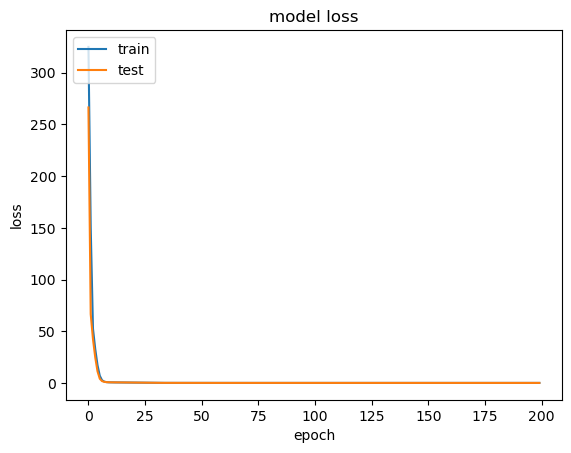

dict_keys(['loss', 'mse', 'mae', 'mape', 'root_mean_squared_error', 'val_loss', 'val_mse', 'val_mae', 'val_mape', 'val_root_mean_squared_error'])


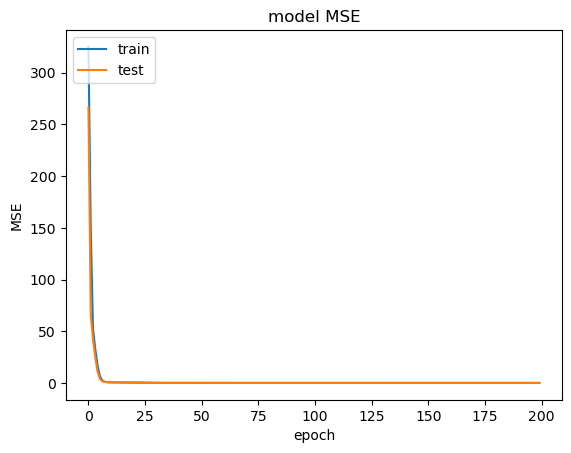

dict_keys(['loss', 'mse', 'mae', 'mape', 'root_mean_squared_error', 'val_loss', 'val_mse', 'val_mae', 'val_mape', 'val_root_mean_squared_error'])


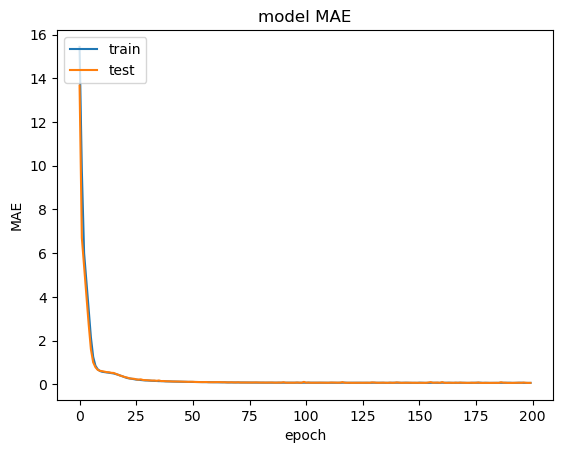

dict_keys(['loss', 'mse', 'mae', 'mape', 'root_mean_squared_error', 'val_loss', 'val_mse', 'val_mae', 'val_mape', 'val_root_mean_squared_error'])


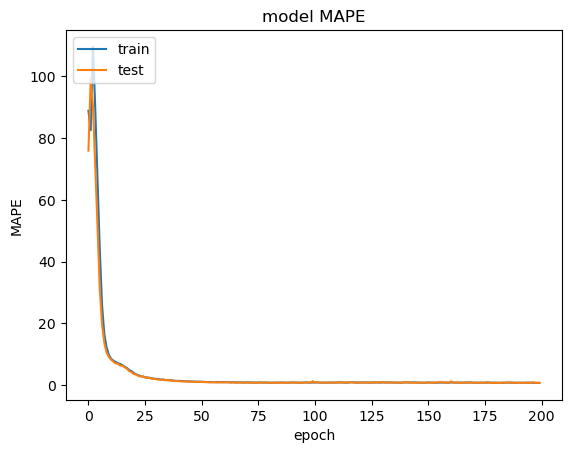

dict_keys(['loss', 'mse', 'mae', 'mape', 'root_mean_squared_error', 'val_loss', 'val_mse', 'val_mae', 'val_mape', 'val_root_mean_squared_error'])


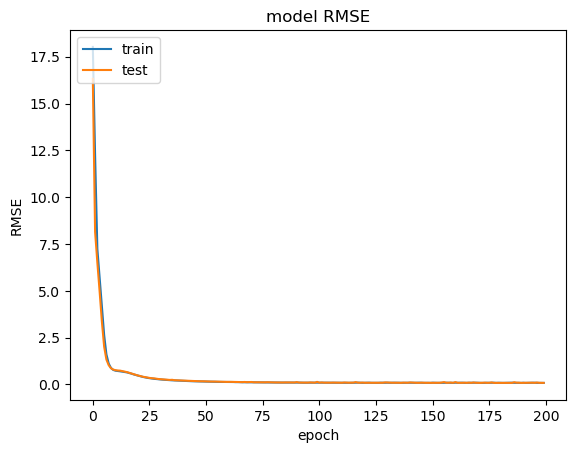

In [50]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mape'])
plt.plot(history.history['val_mape'])
plt.title('model MAPE')
plt.ylabel('MAPE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model RMSE')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Model 4

In [64]:
# simple Neural Network - Single layer : More neuron
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape','RootMeanSquaredError'])
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),verbose=2,epochs=200)

Epoch 1/200
52/52 - 1s - loss: 181.6615 - mse: 181.6615 - mae: 10.5174 - mape: 93.0259 - root_mean_squared_error: 13.4782 - val_loss: 29.4284 - val_mse: 29.4284 - val_mae: 4.5205 - val_mape: 68.3193 - val_root_mean_squared_error: 5.4248
Epoch 2/200
52/52 - 0s - loss: 9.3612 - mse: 9.3612 - mae: 2.2995 - mape: 50.9665 - root_mean_squared_error: 3.0596 - val_loss: 2.4561 - val_mse: 2.4561 - val_mae: 1.2474 - val_mape: 26.8370 - val_root_mean_squared_error: 1.5672
Epoch 3/200
52/52 - 0s - loss: 1.1439 - mse: 1.1439 - mae: 0.8035 - mape: 17.9508 - root_mean_squared_error: 1.0695 - val_loss: 0.5799 - val_mse: 0.5799 - val_mae: 0.6372 - val_mape: 9.6481 - val_root_mean_squared_error: 0.7615
Epoch 4/200
52/52 - 0s - loss: 0.4114 - mse: 0.4114 - mae: 0.4982 - mape: 9.2984 - root_mean_squared_error: 0.6414 - val_loss: 0.2646 - val_mse: 0.2646 - val_mae: 0.4097 - val_mape: 6.5225 - val_root_mean_squared_error: 0.5144
Epoch 5/200
52/52 - 0s - loss: 0.1693 - mse: 0.1693 - mae: 0.3092 - mape: 6.154

Epoch 37/200
52/52 - 0s - loss: 0.0041 - mse: 0.0041 - mae: 0.0499 - mape: 0.5240 - root_mean_squared_error: 0.0640 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0474 - val_mape: 0.4677 - val_root_mean_squared_error: 0.0605
Epoch 38/200
52/52 - 0s - loss: 0.0041 - mse: 0.0041 - mae: 0.0498 - mape: 0.5563 - root_mean_squared_error: 0.0638 - val_loss: 0.0066 - val_mse: 0.0066 - val_mae: 0.0603 - val_mape: 0.5883 - val_root_mean_squared_error: 0.0815
Epoch 39/200
52/52 - 0s - loss: 0.0043 - mse: 0.0043 - mae: 0.0512 - mape: 0.5661 - root_mean_squared_error: 0.0653 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0485 - val_mape: 0.5137 - val_root_mean_squared_error: 0.0646
Epoch 40/200
52/52 - 0s - loss: 0.0042 - mse: 0.0042 - mae: 0.0505 - mape: 0.5548 - root_mean_squared_error: 0.0646 - val_loss: 0.0062 - val_mse: 0.0062 - val_mae: 0.0643 - val_mape: 0.6598 - val_root_mean_squared_error: 0.0789
Epoch 41/200
52/52 - 0s - loss: 0.0046 - mse: 0.0046 - mae: 0.0525 - mape: 0.5468 - root

Epoch 73/200
52/52 - 0s - loss: 0.0095 - mse: 0.0095 - mae: 0.0733 - mape: 0.7413 - root_mean_squared_error: 0.0973 - val_loss: 0.0084 - val_mse: 0.0084 - val_mae: 0.0706 - val_mape: 0.6117 - val_root_mean_squared_error: 0.0917
Epoch 74/200
52/52 - 0s - loss: 0.0058 - mse: 0.0058 - mae: 0.0603 - mape: 0.5946 - root_mean_squared_error: 0.0761 - val_loss: 0.0098 - val_mse: 0.0098 - val_mae: 0.0820 - val_mape: 0.6470 - val_root_mean_squared_error: 0.0990
Epoch 75/200
52/52 - 0s - loss: 0.0046 - mse: 0.0046 - mae: 0.0531 - mape: 0.5708 - root_mean_squared_error: 0.0675 - val_loss: 0.0163 - val_mse: 0.0163 - val_mae: 0.1194 - val_mape: 1.5413 - val_root_mean_squared_error: 0.1278
Epoch 76/200
52/52 - 0s - loss: 0.0068 - mse: 0.0068 - mae: 0.0650 - mape: 0.6832 - root_mean_squared_error: 0.0823 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0437 - val_mape: 0.4091 - val_root_mean_squared_error: 0.0575
Epoch 77/200
52/52 - 0s - loss: 0.0052 - mse: 0.0052 - mae: 0.0553 - mape: 0.5748 - root

Epoch 109/200
52/52 - 0s - loss: 0.0051 - mse: 0.0051 - mae: 0.0533 - mape: 0.5454 - root_mean_squared_error: 0.0712 - val_loss: 0.0021 - val_mse: 0.0021 - val_mae: 0.0360 - val_mape: 0.4807 - val_root_mean_squared_error: 0.0459
Epoch 110/200
52/52 - 0s - loss: 0.0042 - mse: 0.0042 - mae: 0.0501 - mape: 0.5042 - root_mean_squared_error: 0.0645 - val_loss: 0.0122 - val_mse: 0.0122 - val_mae: 0.1016 - val_mape: 1.1586 - val_root_mean_squared_error: 0.1105
Epoch 111/200
52/52 - 0s - loss: 0.0030 - mse: 0.0030 - mae: 0.0427 - mape: 0.4163 - root_mean_squared_error: 0.0551 - val_loss: 0.0023 - val_mse: 0.0023 - val_mae: 0.0376 - val_mape: 0.3429 - val_root_mean_squared_error: 0.0478
Epoch 112/200
52/52 - 0s - loss: 0.0036 - mse: 0.0036 - mae: 0.0456 - mape: 0.4302 - root_mean_squared_error: 0.0597 - val_loss: 0.0017 - val_mse: 0.0017 - val_mae: 0.0319 - val_mape: 0.3907 - val_root_mean_squared_error: 0.0406
Epoch 113/200
52/52 - 0s - loss: 0.0087 - mse: 0.0087 - mae: 0.0707 - mape: 0.7220 -

Epoch 145/200
52/52 - 0s - loss: 0.0070 - mse: 0.0070 - mae: 0.0614 - mape: 0.5515 - root_mean_squared_error: 0.0835 - val_loss: 0.0060 - val_mse: 0.0060 - val_mae: 0.0661 - val_mape: 0.5744 - val_root_mean_squared_error: 0.0776
Epoch 146/200
52/52 - 0s - loss: 0.0052 - mse: 0.0052 - mae: 0.0553 - mape: 0.5708 - root_mean_squared_error: 0.0723 - val_loss: 0.0020 - val_mse: 0.0020 - val_mae: 0.0351 - val_mape: 0.3611 - val_root_mean_squared_error: 0.0446
Epoch 147/200
52/52 - 0s - loss: 0.0052 - mse: 0.0052 - mae: 0.0558 - mape: 0.5293 - root_mean_squared_error: 0.0718 - val_loss: 0.0015 - val_mse: 0.0015 - val_mae: 0.0319 - val_mape: 0.4109 - val_root_mean_squared_error: 0.0394
Epoch 148/200
52/52 - 0s - loss: 0.0045 - mse: 0.0045 - mae: 0.0506 - mape: 0.4735 - root_mean_squared_error: 0.0669 - val_loss: 0.0012 - val_mse: 0.0012 - val_mae: 0.0271 - val_mape: 0.2891 - val_root_mean_squared_error: 0.0341
Epoch 149/200
52/52 - 0s - loss: 0.0034 - mse: 0.0034 - mae: 0.0460 - mape: 0.4479 -

Epoch 181/200
52/52 - 0s - loss: 0.0018 - mse: 0.0018 - mae: 0.0331 - mape: 0.3785 - root_mean_squared_error: 0.0427 - val_loss: 0.0051 - val_mse: 0.0051 - val_mae: 0.0585 - val_mape: 0.4112 - val_root_mean_squared_error: 0.0712
Epoch 182/200
52/52 - 0s - loss: 0.0029 - mse: 0.0029 - mae: 0.0425 - mape: 0.4331 - root_mean_squared_error: 0.0537 - val_loss: 0.0020 - val_mse: 0.0020 - val_mae: 0.0345 - val_mape: 0.3026 - val_root_mean_squared_error: 0.0451
Epoch 183/200
52/52 - 0s - loss: 0.0048 - mse: 0.0048 - mae: 0.0523 - mape: 0.5253 - root_mean_squared_error: 0.0694 - val_loss: 0.0204 - val_mse: 0.0204 - val_mae: 0.1363 - val_mape: 1.4442 - val_root_mean_squared_error: 0.1427
Epoch 184/200
52/52 - 0s - loss: 0.0037 - mse: 0.0037 - mae: 0.0456 - mape: 0.4714 - root_mean_squared_error: 0.0605 - val_loss: 0.0046 - val_mse: 0.0046 - val_mae: 0.0578 - val_mape: 0.4793 - val_root_mean_squared_error: 0.0681
Epoch 185/200
52/52 - 0s - loss: 0.0035 - mse: 0.0035 - mae: 0.0461 - mape: 0.4779 -

dict_keys(['loss', 'mse', 'mae', 'mape', 'root_mean_squared_error', 'val_loss', 'val_mse', 'val_mae', 'val_mape', 'val_root_mean_squared_error'])


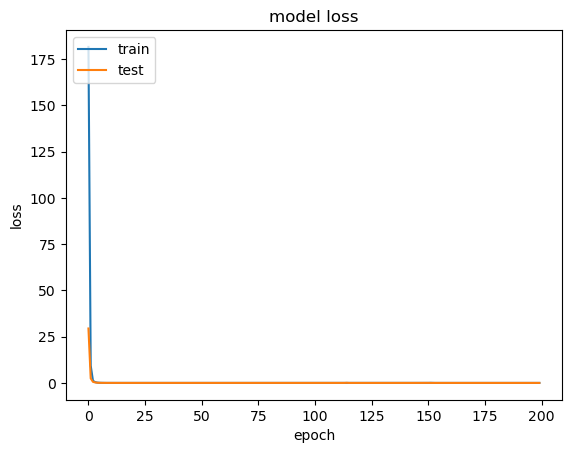

dict_keys(['loss', 'mse', 'mae', 'mape', 'root_mean_squared_error', 'val_loss', 'val_mse', 'val_mae', 'val_mape', 'val_root_mean_squared_error'])


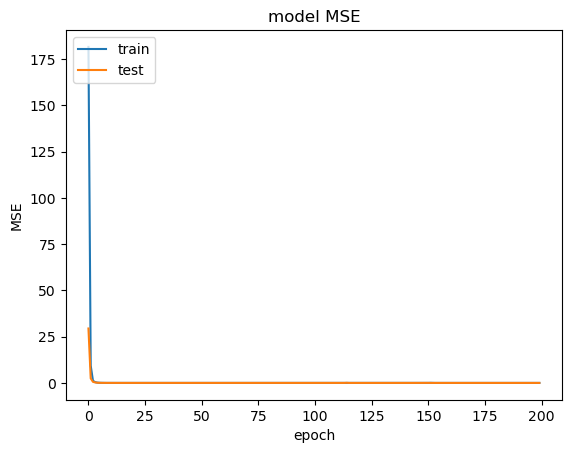

dict_keys(['loss', 'mse', 'mae', 'mape', 'root_mean_squared_error', 'val_loss', 'val_mse', 'val_mae', 'val_mape', 'val_root_mean_squared_error'])


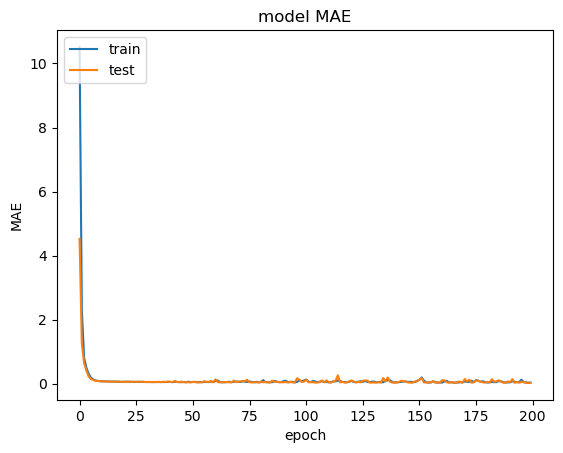

dict_keys(['loss', 'mse', 'mae', 'mape', 'root_mean_squared_error', 'val_loss', 'val_mse', 'val_mae', 'val_mape', 'val_root_mean_squared_error'])


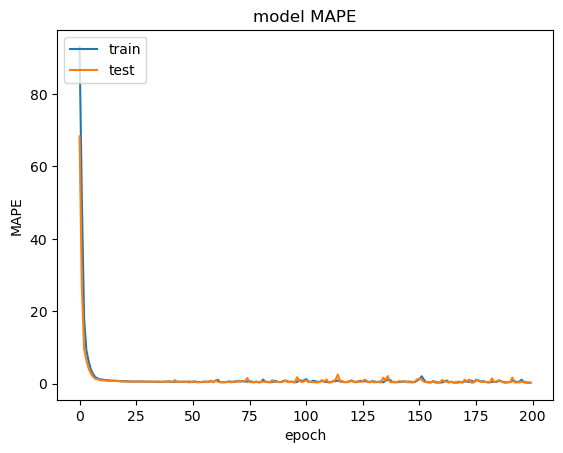

dict_keys(['loss', 'mse', 'mae', 'mape', 'root_mean_squared_error', 'val_loss', 'val_mse', 'val_mae', 'val_mape', 'val_root_mean_squared_error'])


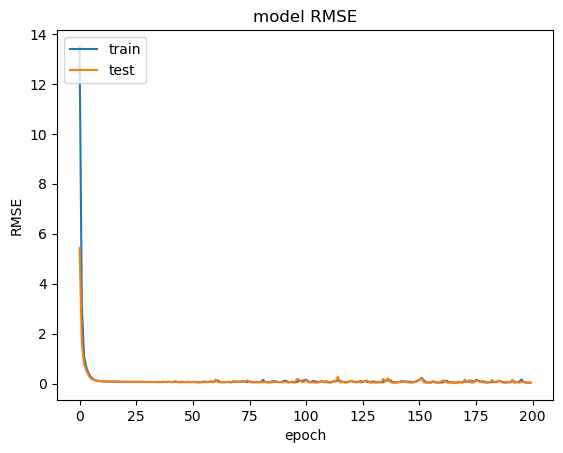

In [65]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mape'])
plt.plot(history.history['val_mape'])
plt.title('model MAPE')
plt.ylabel('MAPE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model RMSE')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Pass the image pixel information for depth approximation

In [66]:
# Predict distance to any pixel
Xnew = np.array([[640,360]])
Xnew= scaler.transform(Xnew)
ynew= model.predict(Xnew)
#invert normalize
#ynew = scaler.inverse_transform(ynew) 
Xnew = scaler.inverse_transform(Xnew)
print("X=%s, Predicted Depth =%s" % (Xnew[0], ynew[0]))

X=[640. 360.], Predicted Depth =[29.971645]


In [67]:
# Predict distance to any pixel
Xnew = np.array([[10,360]])
Xnew= scaler.transform(Xnew)
ynew= model.predict(Xnew)
#invert normalize
#ynew = scaler.inverse_transform(ynew) 
Xnew = scaler.inverse_transform(Xnew)
print("X=%s, Predicted Depth =%s" % (Xnew[0], ynew[0]))

X=[ 10. 360.], Predicted Depth =[38.171307]
